In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-11-20 06:38:30.013691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763620710.192237      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763620710.239959      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Loading images...
Dataset Loaded:
Images shape: (39209, 48, 48, 3)
Labels shape: (39209,)
Train: (31367, 48, 48, 3) Test: (7842, 48, 48, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763620961.030606      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,480,779 (5.65 MB)

 Trainable params: 1,479,371 (5.64 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1763620967.292607     110 service.cc:148] XLA service 0x7d19f401db50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763620967.293702     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763620968.015434     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


  4/491 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.0286 - loss: 5.3367 

I0000 00:00:1763620974.251637     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.2784 - loss: 2.9265 - val_accuracy: 0.6665 - val_loss: 1.0502
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7904 - loss: 0.6696 - val_accuracy: 0.9763 - val_loss: 0.0834
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9127 - loss: 0.2792 - val_accuracy: 0.9915 - val_loss: 0.0363
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9541 - loss: 0.1552 - val_accuracy: 0.9946 - val_loss: 0.0192
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9677 - loss: 0.1039 - val_accuracy: 0.9966 - val_loss: 0.0122
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9964 - val_loss: 0.0112
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9754 - loss: 0.0786 - val_accuracy: 0.9974 - val_loss: 0.0076
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9824 - loss: 0.0584 - val_accurac

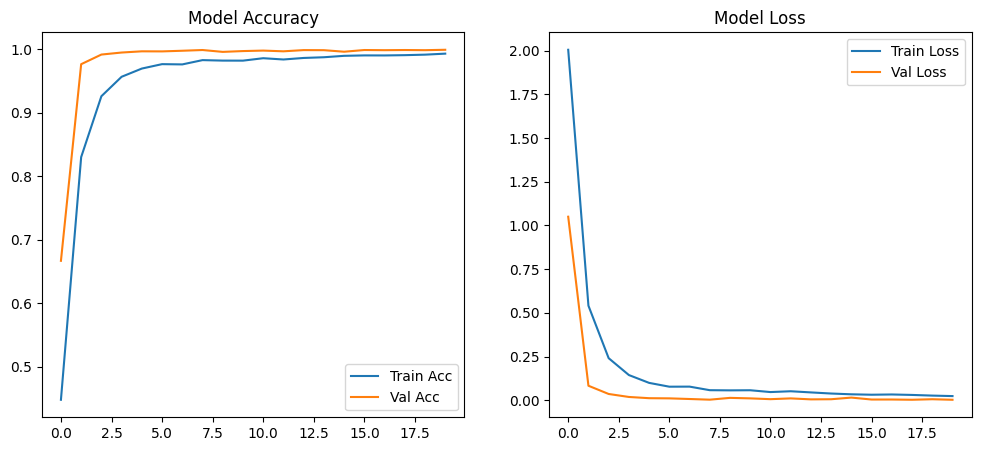

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00       450
           3       1.00      1.00      1.00       282
           4       0.99      1.00      1.00       396
           5       1.00      1.00      1.00       372
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00       288
           8       1.00      0.99      0.99       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       1.00      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       1.00      1.00      1.00       126
          16  

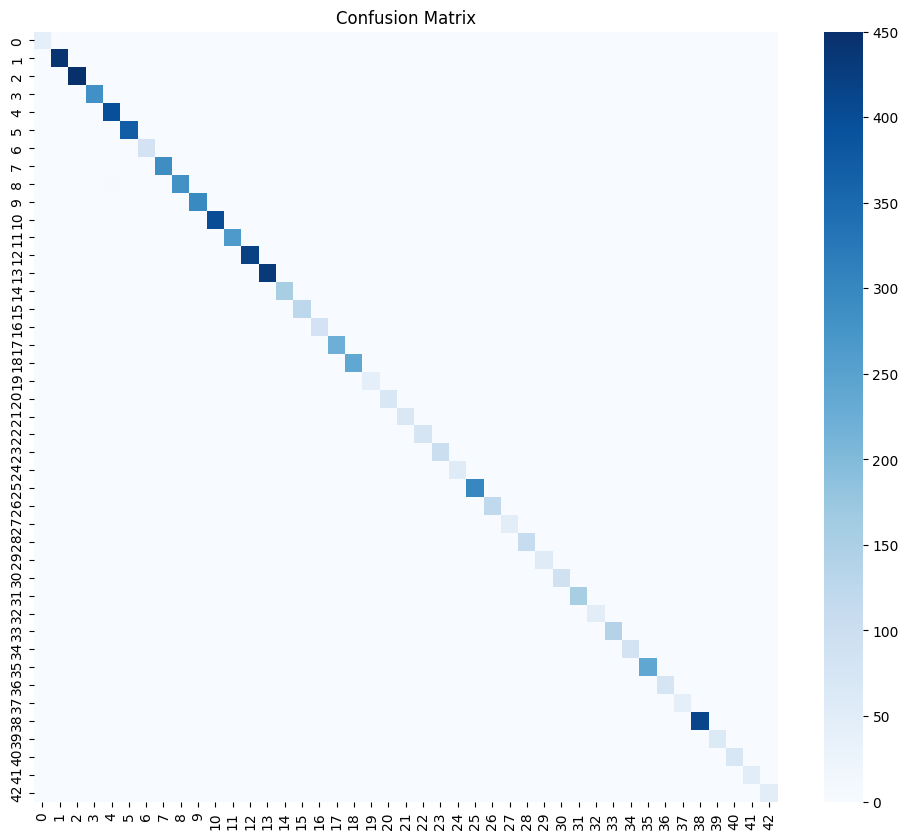


🎉 Training Complete!


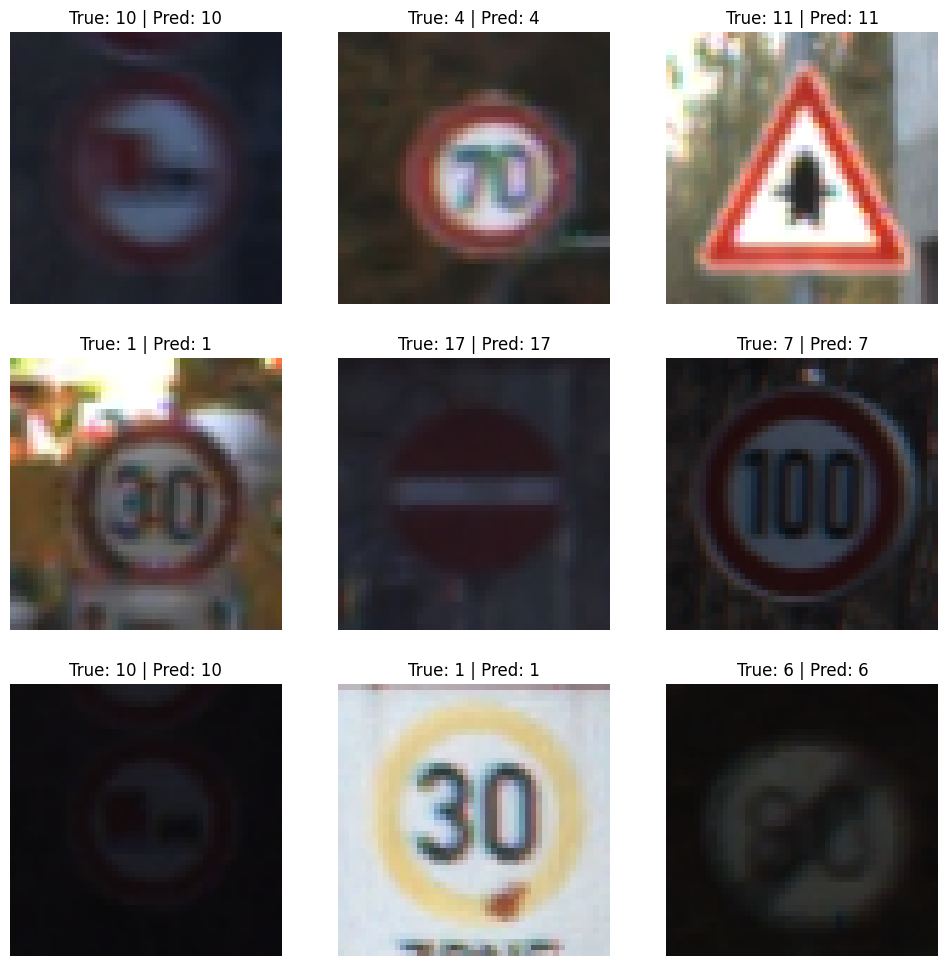

In [2]:
# ============================================================
# GTSRB - German Traffic Sign Recognition
# Deep Learning | TensorFlow | CNN Model
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============================================================
# 1. LOAD DATASET
# ============================================================

DATASET_PATH = "/kaggle/input/gtsrb-german-traffic-sign/train"

img_size = 48   # standard for GTSRB
images = []
labels = []

print("Loading images...")

for class_id in sorted(os.listdir(DATASET_PATH)):
    class_path = os.path.join(DATASET_PATH, class_id)

    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read, resize, normalize
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size, img_size))

        images.append(img)
        labels.append(int(class_id))

images = np.array(images)
labels = np.array(labels)

print("Dataset Loaded:")
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Normalize
images = images / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Train:", X_train.shape, "Test:", X_test.shape)


# ============================================================
# 2. DATA AUGMENTATION
# ============================================================

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
)

datagen.fit(X_train)

num_classes = len(np.unique(labels))


# ============================================================
# 3. CNN MODEL
# ============================================================

def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size,img_size,3)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),  
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.30),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.40),

        Flatten(),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.50),

        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model = build_model()
model.summary()


# ============================================================
# 4. TRAIN MODEL
# ============================================================

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)

# Save model
model.save("gtsrb_cnn_model.h5")


# ============================================================
# 5. PERFORMANCE VISUALIZATION
# ============================================================

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Model Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


# ============================================================
# 6. CONFUSION MATRIX & METRICS
# ============================================================

y_pred = np.argmax(model.predict(X_test), axis=1)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", annot=False)
plt.title("Confusion Matrix")
plt.show()


# ============================================================
# 7. PLOT SAMPLE PREDICTIONS
# ============================================================

def show_predictions(n=9):
    plt.figure(figsize=(12,12))

    idxs = np.random.choice(len(X_test), n)

    for i, idx in enumerate(idxs, 1):
        plt.subplot(3,3,i)
        plt.imshow(X_test[idx])
        plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
        plt.axis("off")

show_predictions()

print("\n🎉 Training Complete!")


Loading images from: /kaggle/input/gtsrb-german-traffic-sign/Test
Total test images loaded: 12630
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Prediction complete!


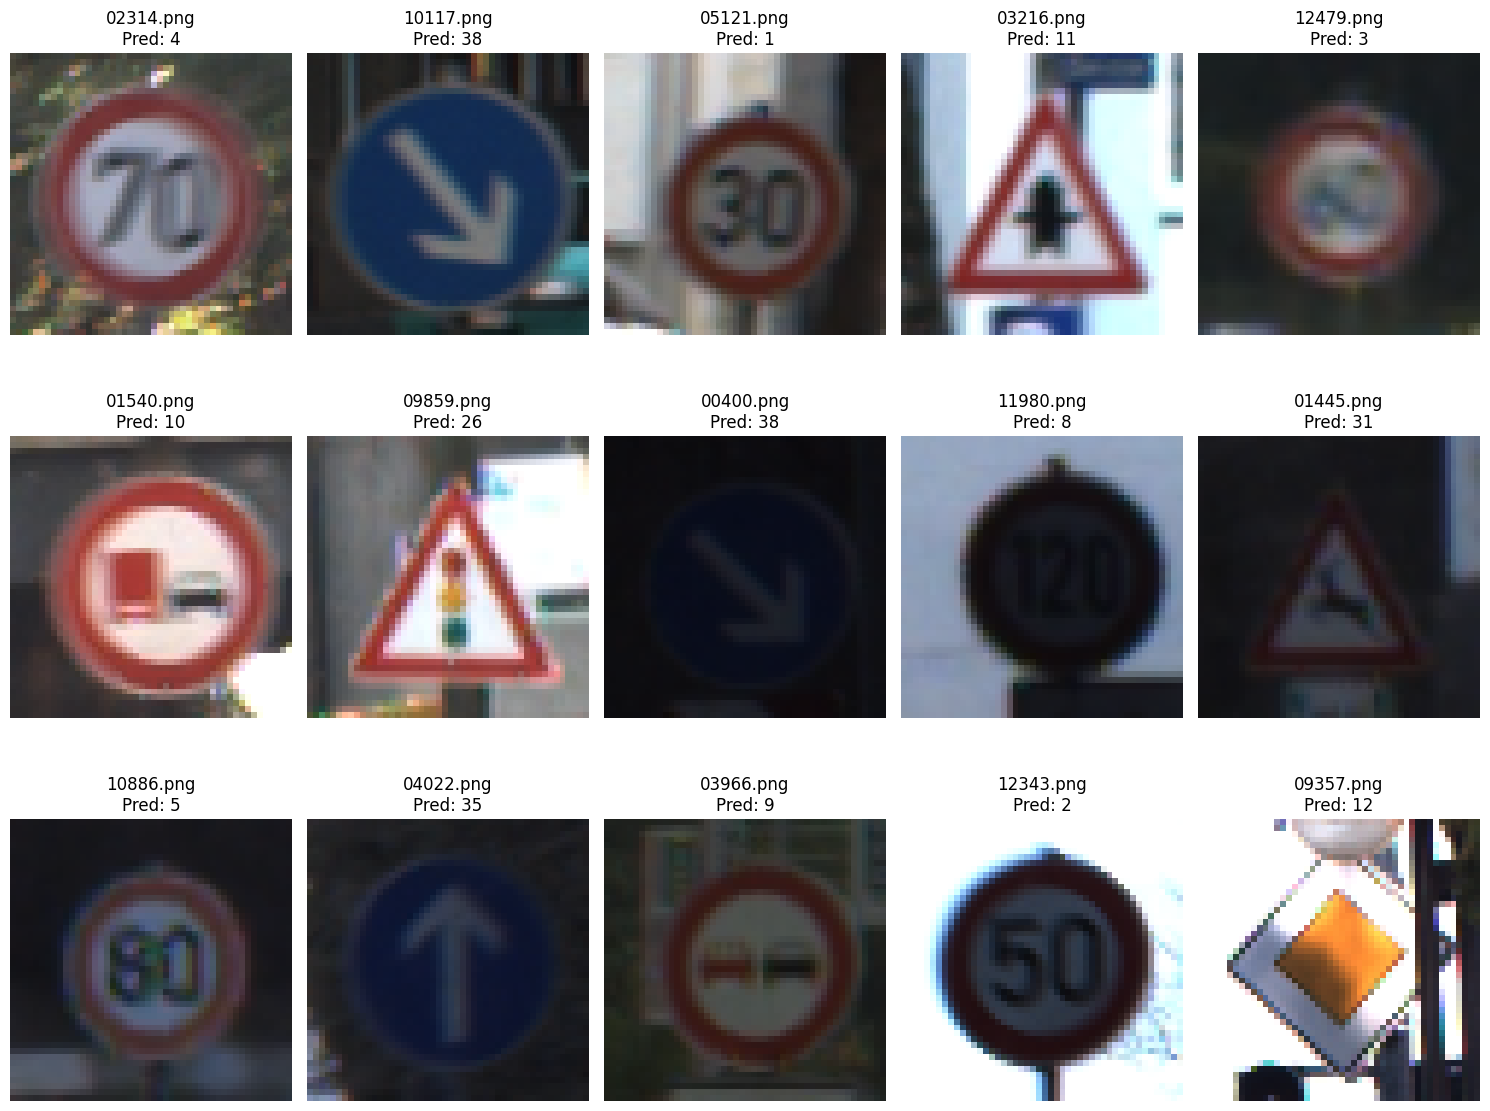

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

TEST_PATH = "/kaggle/input/gtsrb-german-traffic-sign/Test"
IMG_SIZE = 48   # same size used in training

# ============================================================
# LOAD TEST IMAGES
# ============================================================

test_images = []
test_image_names = []

print("Loading images from:", TEST_PATH)

for img_name in sorted(os.listdir(TEST_PATH)):
    img_path = os.path.join(TEST_PATH, img_name)

    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    test_images.append(img)
    test_image_names.append(img_name)

test_images = np.array(test_images) / 255.0

print("Total test images loaded:", len(test_images))


# ============================================================
# PREDICT
# ============================================================

pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)

print("Prediction complete!")


# ============================================================
# VISUALIZE SAMPLE PREDICTIONS
# ============================================================

def visualize_test_predictions(n=15):
    plt.figure(figsize=(15, 12))

    idxs = np.random.choice(len(test_images), n, replace=False)

    for i, idx in enumerate(idxs, start=1):
        plt.subplot(3, 5, i)
        plt.imshow(test_images[idx])
        plt.axis("off")
        pred = pred_classes[idx]
        name = test_image_names[idx]

        plt.title(f"{name}\nPred: {pred}")

    plt.tight_layout()
    plt.show()

visualize_test_predictions(15)
